In [1]:
train_df <- read.csv("../Data/Titanic_train.csv")
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [2]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [3]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### 컬럼 내용 확인
- Survived : 생존여부, 0=사망, 1=생존
- Pclass : 티켓등급, 1=1등급, 2=2등급, 3=3등급
- Sibsp : 함께 탑승한 형제, 자매, 배우자의 수
- Parch : 함께 탑승한 부모, 자식의 수
- Fare : 운임
- Cabin : 객실 번호
- Embarked : 탑승항구, C=Chersbourg, Q=Queenstown, S=Southampton



In [4]:
# 각 컬럼별 NA 확인
sum(is.na(train_df))
colSums(is.na(train_df)) # 컬럼별 합계

[1] 177

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [5]:
177/891

[1] 0.1986532

In [6]:
# train_df$Age가 NA인 것 빼고 데이터셋 만들기

head(subset(train_df, !is.na(train_df$Age)))  # is.na() subset 조건으로 활용가능, ==NA 등이 방식 사용불가
nrow(subset(train_df, !is.na(train_df$Age)))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


[1] 714

In [7]:
# Survived 기준으로 Dataset 정렬
library(dplyr)

train_df <- arrange(train_df, Survived)
print(head(train_df))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



  PassengerId Survived Pclass                           Name  Sex Age SibSp
1           1        0      3        Braund, Mr. Owen Harris male  22     1
2           5        0      3       Allen, Mr. William Henry male  35     0
3           6        0      3               Moran, Mr. James male  NA     0
4           7        0      1        McCarthy, Mr. Timothy J male  54     0
5           8        0      3 Palsson, Master. Gosta Leonard male   2     3
6          13        0      3 Saundercock, Mr. William Henry male  20     0
  Parch    Ticket    Fare Cabin Embarked
1     0 A/5 21171  7.2500              S
2     0    373450  8.0500              S
3     0    330877  8.4583              Q
4     0     17463 51.8625   E46        S
5     1    349909 21.0750              S
6     0 A/5. 2151  8.0500              S


In [8]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [9]:
# 정렬된 크기 확인
dim(train_df)

[1] 891  12

# Target Column : Survived 분석 및 확인

In [10]:
table(train_df$Survived)


  0   1 
549 342 

In [11]:
# Survived의 생존과 사망 Count 확인 및 비율

# 사망자수
nrow(subset(train_df, Survived==0))
# 생존사주
nrow(subset(train_df, Survived==1))
# 생존자수의 비율
nrow(subset(train_df, Survived==1)) / nrow(train_df)

[1] 549

[1] 342

[1] 0.3838384

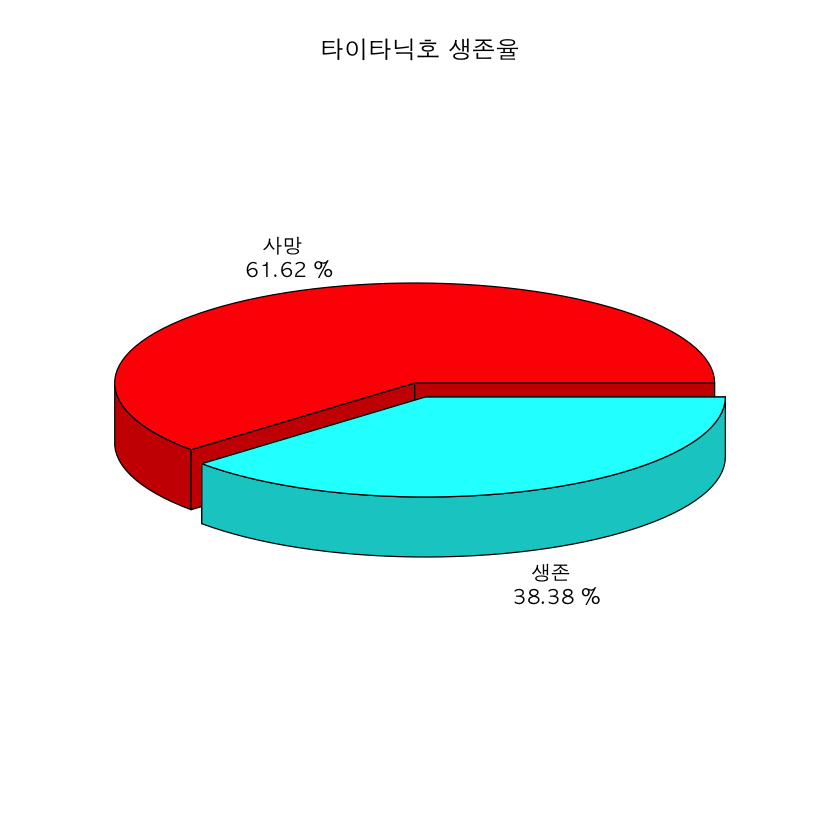

In [12]:
# 생존과 사망 비율을 Pie Chart로 생성
library(plotrix)

par(family = "AppleGothic")
options(warn = -1)

survived <- c("사망", "생존")
ratio <- c(round(nrow(subset(train_df, Survived==0)) / nrow(train_df) * 100 ,2), 
           round(nrow(subset(train_df, Survived==1)) / nrow(train_df) * 100 ,2))
label <- paste(survived, '\n', ratio, "%")

pie3D(ratio,
    main = "타이타닉호 생존율",
    labels = label,  
    explode = 0.05,
    labelcex = 1
   )

In [13]:
# 생존자와 사망자수
deathCount <- sum(train_df$Survived == 0)
liveCount <- sum(train_df$Survived == 1)

In [14]:
SurviedVector <- c(deathCount, liveCount)
SurviedVector

[1] 549 342

In [15]:
ratio <- round(SurviedVector / sum(SurviedVector) * 100, 2)
label <- paste(c("사망", "생존"), "\n", ratio, "%")
label

[1] "사망 \n 61.62 %" "생존 \n 38.38 %"

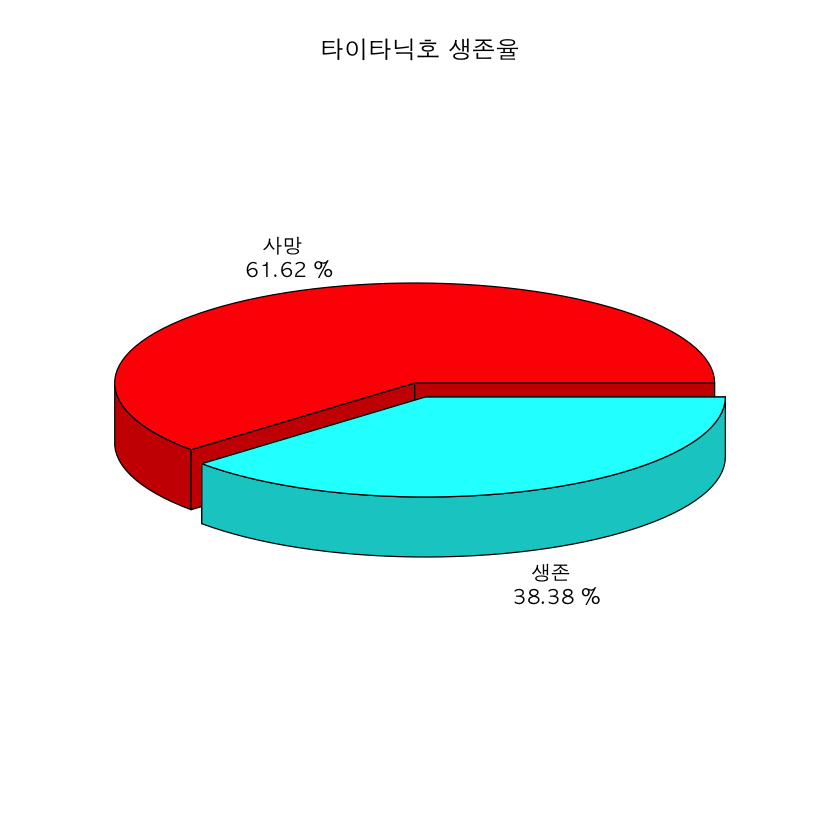

In [16]:
par(family = "AppleGothic")
options(warn = -1)

pie3D(ratio,
    main = "타이타닉호 생존율",
    labels = label,  
    explode = 0.05,
    labelcex = 1
   )

In [17]:
ratio

[1] 61.62 38.38

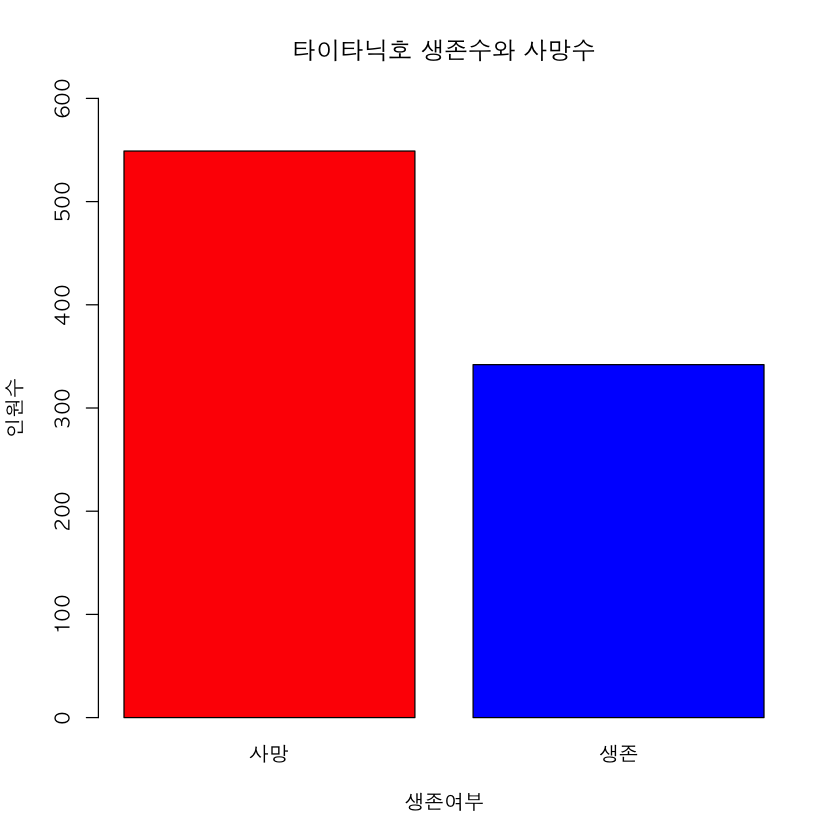

In [18]:
names(SurviedVector) <- c("사망", "생존")

par(family = "AppleGothic")

barplot(SurviedVector,
       ylim = c(0, 600),
       col = c("red", "blue"),
       main = "타이타닉호 생존수와 사망수",
       ylab = "인원수",
       xlab = "생존여부"
       ) 

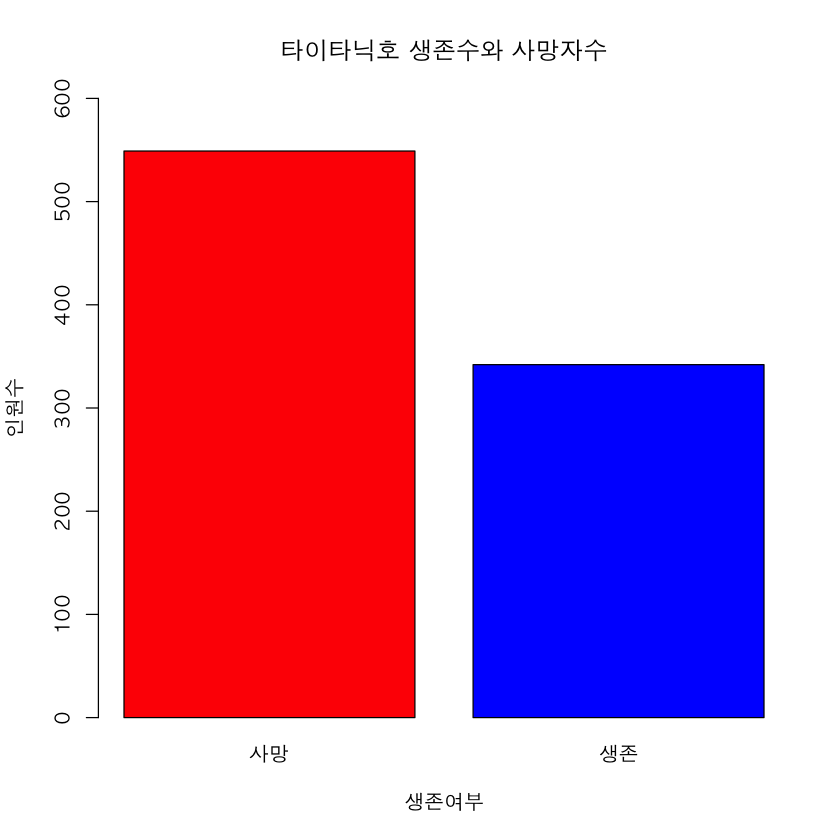

In [19]:
par(family = "AppleGothic")
barplot(table(train_df$Survived),
       main = "타이타닉호 생존수와 사망자수",
       ylab = "인원수",
       xlab = "생존여부",
       names = c("사망", "생존"), 
       ylim = c(0, 600),
       col = c("red", "blue")
       )

> Target Coulmn으로 Survived를 선정

---
# Feature column 찾기

In [20]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


### Sex 컬럼확인

In [21]:
# Sex 컬럼 분류 확인
unique(train_df$Sex)

[1] male   female
Levels: female male

In [22]:
# 여성과 남성의 인원 학인
femaleCount <- sum(train_df$Sex == 'female'); femaleCount
maleCount <- sum(train_df$Sex == 'male'); maleCount

[1] 314

[1] 577

In [23]:
# 여성의 생존수와 사망수
femaleDeathCount <- sum(train_df$Sex == 'female' & train_df$Survived == 0); femaleDeathCount
femaleSurviveCount <- sum(train_df$Sex == 'female' & train_df$Survived == 1); femaleSurviveCount

[1] 81

[1] 233

In [24]:
# 남성의 생존수와 사망수
maleDeathCount <- sum(train_df$Sex == 'male' & train_df$Survived == 0); maleDeathCount
maleSurviveCount <- sum(train_df$Sex == 'male' & train_df$Survived == 1); maleSurviveCount

[1] 468

[1] 109

In [25]:
# 여성의 생존율과 사망율
cat("여성의 생존율 :",round(femaleSurviveCount / femaleCount * 100, 2), "%", "\n")
cat("여성의 사망율 :",round(femaleDeathCount / femaleCount * 100, 2), "%", "\n")

여성의 생존율 : 74.2 % 
여성의 사망율 : 25.8 % 


In [26]:
# 남성의 생존율과 사망률
cat("남성의 생존율 :",round(maleSurviveCount / maleCount * 100, 2), "%", "\n")
cat("남성의 사망율 :",round(maleDeathCount / maleCount * 100, 2), "%", "\n")

남성의 생존율 : 18.89 % 
남성의 사망율 : 81.11 % 


> Sex 컬럼은 Feature로 적합
> [Survived] <- [Sex]

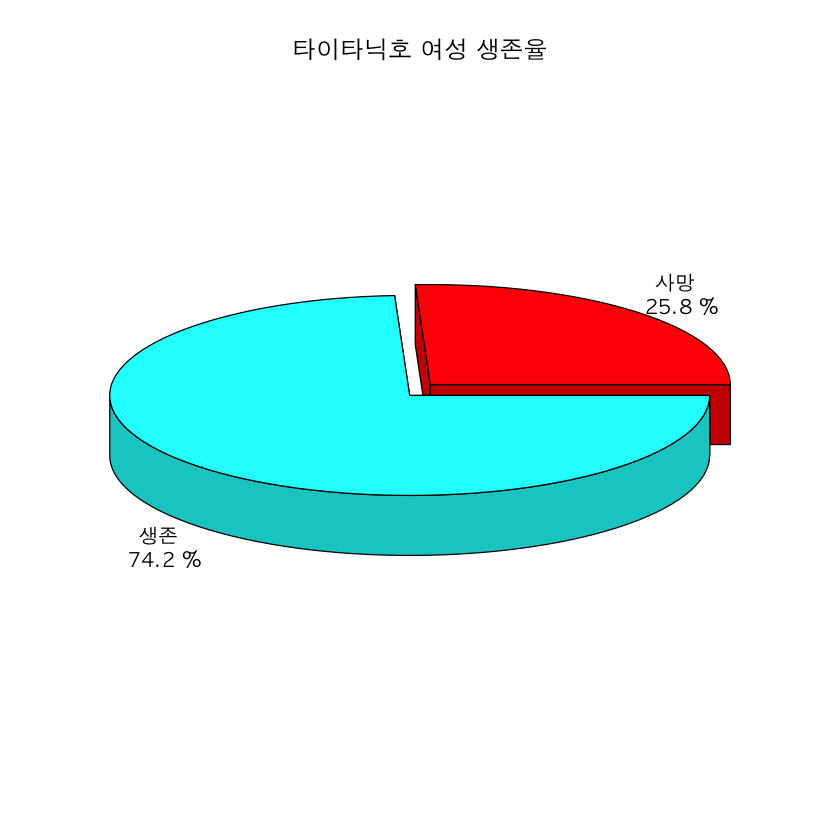

In [27]:
# 타이타닉호 여성 생존율
par(family = "AppleGothic")
options(warn = -1)

ratio = c(round(femaleDeathCount / femaleCount * 100, 2), round(femaleSurviveCount / femaleCount * 100, 2))
label = paste(c('사망', '생존'),"\n", ratio, "%")

pie3D(ratio,
    main = "타이타닉호 여성 생존율",
    labels = label,  
    explode = 0.05,
    labelcex = 1,
   )

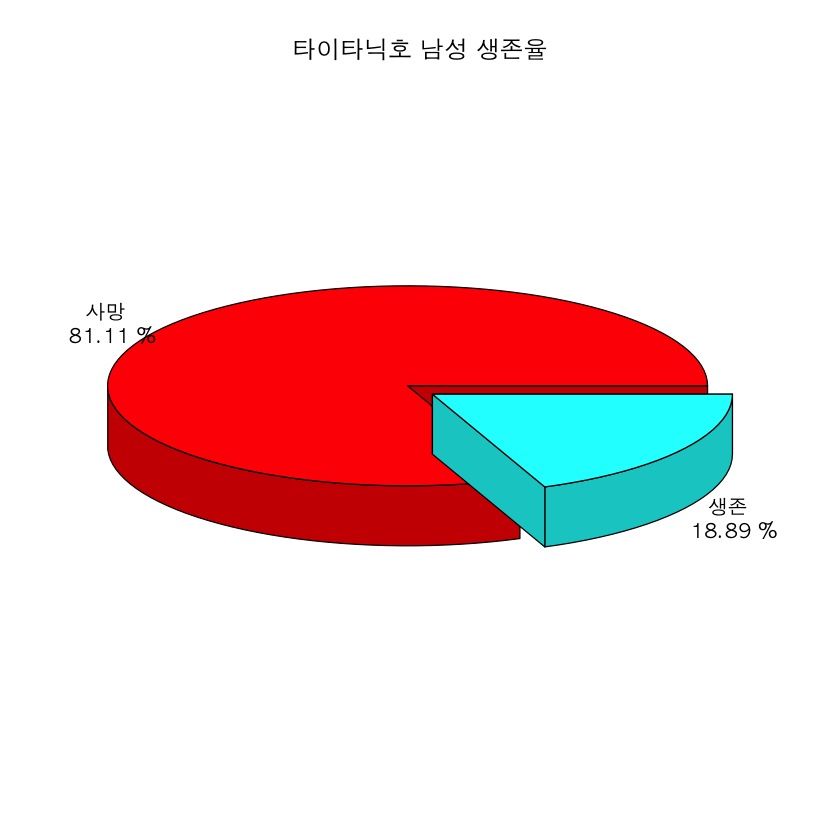

In [28]:
# 타이타닉호 남성 생존율

par(family = "AppleGothic")
options(warn = -1)

ratio = c(round(maleDeathCount / maleCount * 100, 2), round(maleSurviveCount / maleCount * 100, 2))
label = paste(c('사망', '생존'),"\n", ratio, "%")

pie3D(ratio,
    main = "타이타닉호 남성 생존율",
    labels = label,  
    explode = 0.05,
    labelcex = 1,
   )

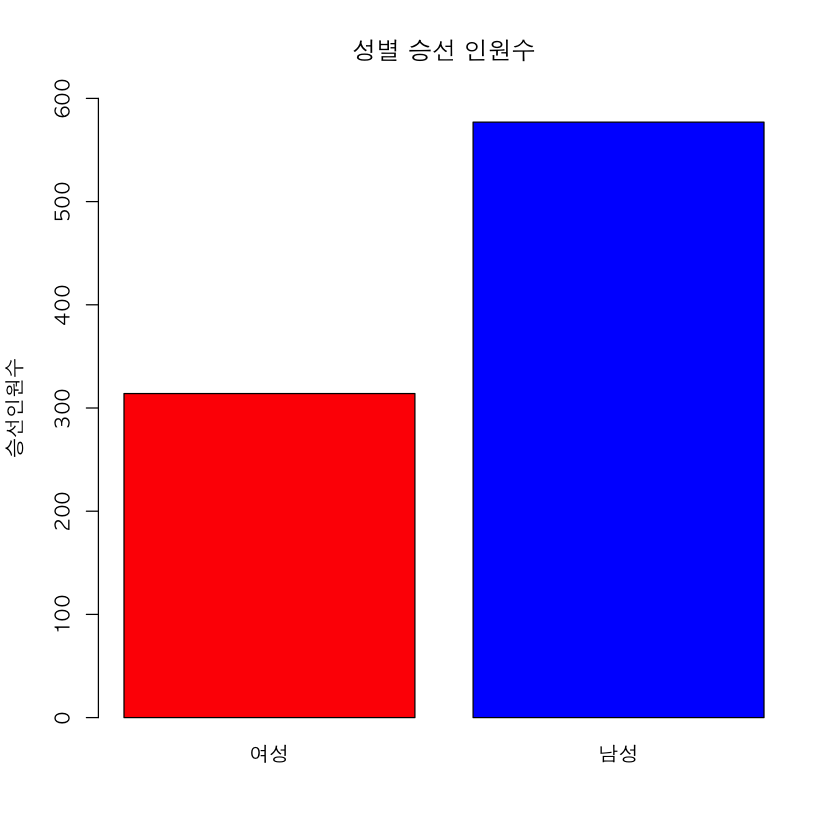

In [29]:
# 성별 승선 인원수

par(family = "AppleGothic")

barplot(table(train_df$Sex),
       col = c("red", "blue"),
       ylim = c(0, 600),
       ylab = "승선인원수",
       names = c("여성", "남성"),
       main = "성별 승선 인원수"
       )

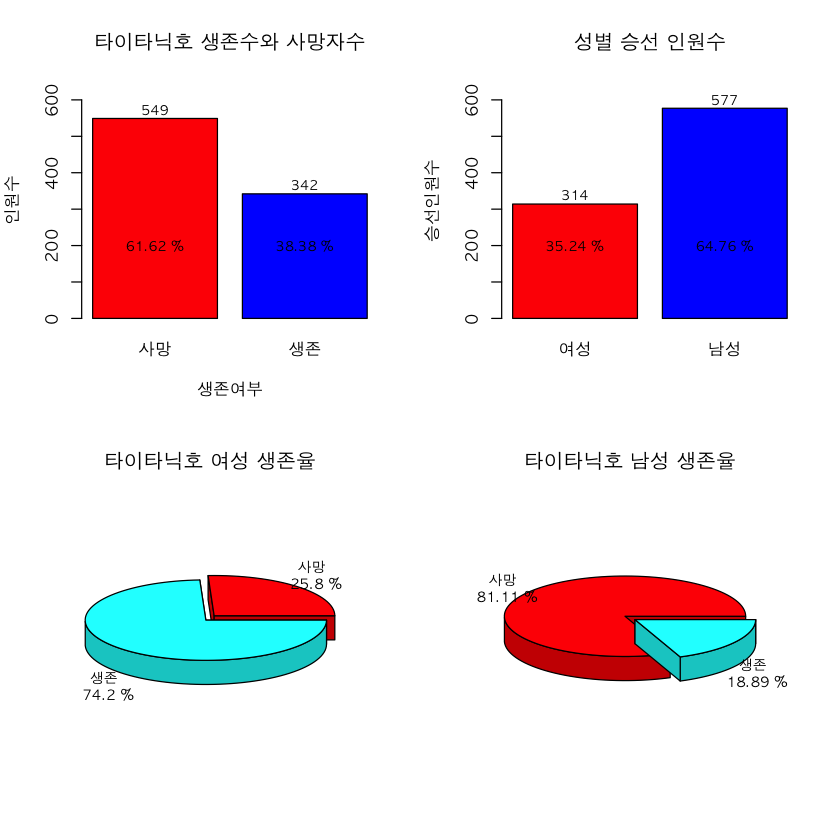

In [30]:
par(mfrow = c(2,2)) 
par(family = "AppleGothic")

barplot(table(train_df$Survived),
       main = "타이타닉호 생존수와 사망자수",
       ylab = "인원수",
       xlab = "생존여부",
       names = c("사망", "생존"), 
       ylim = c(0, 650),
       col = c("red", "blue"),
       )
for(i in 1:2) {    
    d <- (0.7 + 1.2*(i-1))
    val <- table(train_df$Survived)[i]
    val2 <- paste(round(val / nrow(train_df) * 100, 2), "%")
    text(d, val+25, val, cex=0.8)
    text(d, 200, val2, cex =0.8 )
}


barplot(table(train_df$Sex),
       col = c("red", "blue"),
       ylim = c(0, 650),
       ylab = "승선인원수",
       names = c("여성", "남성"),
       main = "성별 승선 인원수"
       )

for(i in 1:2) {    
    d <- (0.7 + 1.2*(i-1))
    val <- table(train_df$Sex)[i]
    val2 <- paste(round(val / nrow(train_df) * 100, 2), "%")
    text(d, val+25, val, cex=0.8)
    text(d, 200, val2, cex =0.8 )
}


ratio = c(round(femaleDeathCount / femaleCount * 100, 2), round(femaleSurviveCount / femaleCount * 100, 2))
label = paste(c('사망', '생존'),"\n", ratio, "%")

pie3D(ratio,
    main = "타이타닉호 여성 생존율",
    labels = label,  
    explode = 0.05,
    labelcex = 0.7,
   )

ratio = c(round(maleDeathCount / maleCount * 100, 2), round(maleSurviveCount / maleCount * 100, 2))
label = paste(c('사망', '생존'),"\n", ratio, "%")

pie3D(ratio,
    main = "타이타닉호 남성 생존율",
    labels = label,  
    explode = 0.05,
    labelcex = 0.7,
   )

In [31]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


## 티켓 등급 분석

In [32]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [33]:
# 1등 객실의 여성 생존율

firstFemaleSurvive <- nrow(subset(train_df, Sex == 'female' & Pclass == 1 & Survived == 1))
firstFemaleSDeath <- nrow(subset(train_df, Sex == 'female' & Pclass == 1 & Survived == 0))
firstFemale <- firstFemaleSurvive + firstFemaleSDeath

cat("1등 객실의 여성 생존율은 ", firstFemaleSurvive, "/",firstFemale, ",", round(firstFemaleSurvive/firstFemale * 100, 2), "%")

1등 객실의 여성 생존율은  91 / 94 , 96.81 %

In [34]:
sex <- c("female", "male")
sex2 <- c("여성", "남성")
surv <- c()
for(j in 1:2) {
    for(i  in 1:3) {
        cat(i, "등 객실의",sex2[j], "생존율은 ")
        cat(sum(train_df$Pclass == i & train_df$Survived == 1 & train_df$Sex == sex[j]), "/")
        cat(sum(train_df$Pclass == i & train_df$Sex == sex[j]), ", ")
        cat(round(sum(train_df$Pclass == i & train_df$Survived == 1 & train_df$Sex == sex[j]) /
              sum(train_df$Pclass == i & train_df$Sex == sex[j]) * 100, 2), "%", "\n")
        surv = append(surv, round(sum(train_df$Pclass == i & train_df$Survived == 1 & train_df$Sex == sex[j]) /
              sum(train_df$Pclass == i & train_df$Sex == sex[j]) * 100, 2))

    }
    cat('--------------------------------------------\n')
}

1 등 객실의 여성 생존율은 91 /94 , 96.81 % 
2 등 객실의 여성 생존율은 70 /76 , 92.11 % 
3 등 객실의 여성 생존율은 72 /144 , 50 % 
--------------------------------------------
1 등 객실의 남성 생존율은 45 /122 , 36.89 % 
2 등 객실의 남성 생존율은 17 /108 , 15.74 % 
3 등 객실의 남성 생존율은 47 /347 , 13.54 % 
--------------------------------------------


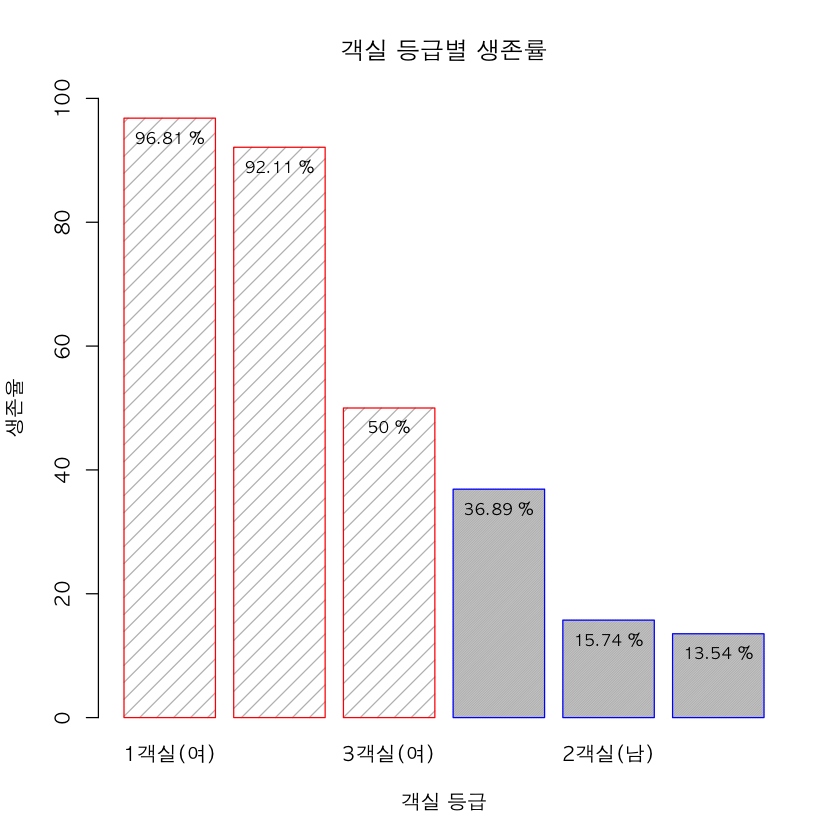

In [35]:
# 객실 등급별 생존율

par(family = "AppleGothic")

barplot(surv,
       ylim = c(0,100),
       ylab = "생존율",
       main = "객실 등급별 생존률",
       border = c(rep('red', 3), rep('blue', 3)),
       density = c(rep(10, 3), rep(100, 3)),
       xlab = "객실 등급",
       names = c("1객실(여)","","3객실(여)", "", "2객실(남)", "")
       )


for(i in 1:length(surv)) {    
    d <- (0.7 + 1.2*(i-1))
    height <- surv[i] - 3
    val <- paste(surv[i], "%")
    text(d, height, val, cex=0.8)
}

> [Survived] <- [Sex, Pclass]

In [36]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### Embarked(항구의 위치)

In [37]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [38]:
table(train_df$Embarked)


      C   Q   S 
  2 168  77 644 

In [39]:
unique(train_df$Embarked)

[1] S Q C  
Levels:  C Q S

In [40]:
# 빈칸의 데이터 찾기
subset(train_df, Embarked == "")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [41]:
# 제일 많은 운임을 지불한 사람
subset(train_df, Fare == max(train_df$Fare))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,,C
814,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
836,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C


In [42]:
mean(train_df$Fare)

[1] 32.20421

In [43]:
# 항구별 탑습인원을 구하여 가장 많은 탑승인원의 항구로 결정

# S항구 탑습인원
sum(train_df$Embarked == 'S')

# C항구 탑습인원
sum(train_df$Embarked == 'C')

# Q항구 탑습인원
sum(train_df$Embarked == 'Q')

table(train_df$Embarked)

[1] 644

[1] 168

[1] 77


      C   Q   S 
  2 168  77 644 

> 빈값 항구를 S항구로 변경

In [44]:
# 연습을 위한 데이터셋 복제
train_df_T <- train_df

In [45]:
# 빈칸 항구 찾기 - 1
subset(train_df_T, Embarked == "")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [46]:
# 빈칸 항구 찾기 - 2
train_df_T[train_df_T$Embarked == "",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [47]:
# 빈칸 항구를 S항구로 변경 - 1
train_df_T$Embarked <- ifelse(train_df_T$Embarked == "", 'S', train_df_T$Embarked) 
# subset으로 ""을 얻고 바로 넣을 수는 없다

In [48]:
# 빈칸 항구를 S항구로 변경 - 2
train_df_T <- train_df
table(train_df_T$Embarked)


      C   Q   S 
  2 168  77 644 

In [49]:
train_df_T[train_df_T$Embarked == "",]$Embarked <- "S" # [행렬위치, ]$Embarked

In [50]:
# 빈칸 항구를 S항구로 변경 - 3
train_df_T <- train_df

In [51]:
train_df_T$Embarked[train_df_T$Embarked == ""] <- "S"   # $Embarked[조건위치]

In [52]:
table(train_df_T$Embarked)


      C   Q   S 
  0 168  77 646 

In [53]:
train_df$Embarked <- ifelse(train_df$Embarked == "", 'S', train_df$Embarked)

In [54]:
train_df$Embarked <- factor(train_df_T$Embarked)
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


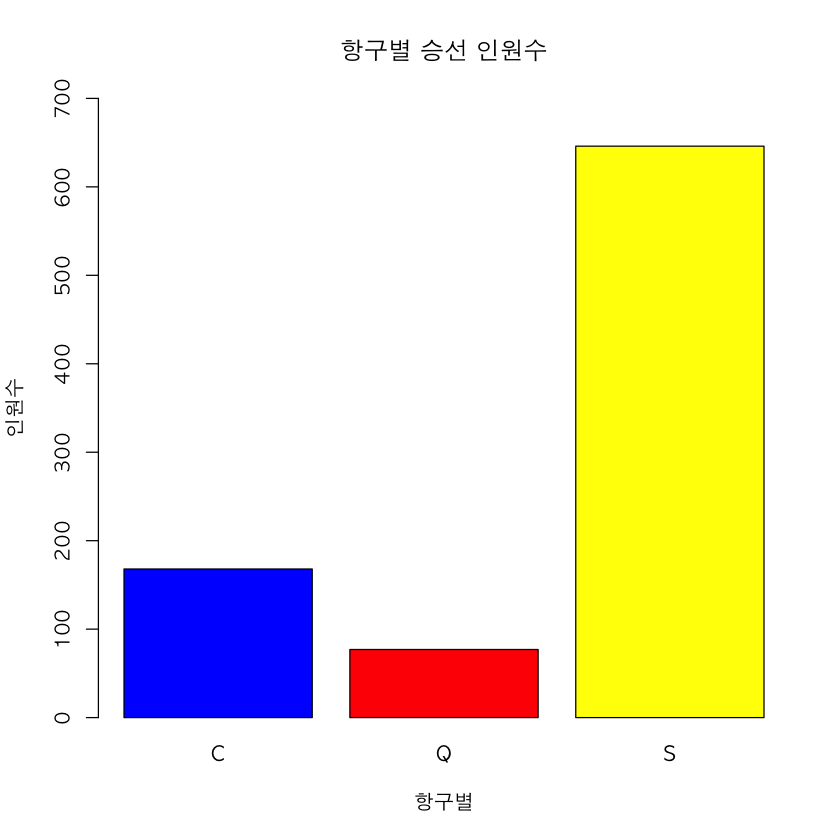

In [55]:
# 항구별 승선 인원

par(family = "AppleGothic")

barplot(table(train_df$Embarked),
       col = c("blue", "red", "yellow"),
       xlab = "항구별",
       ylab = "인원수",
       main = "항구별 승선 인원수",
       ylim = c(0, 700),
       lengend.text = T
       
       )



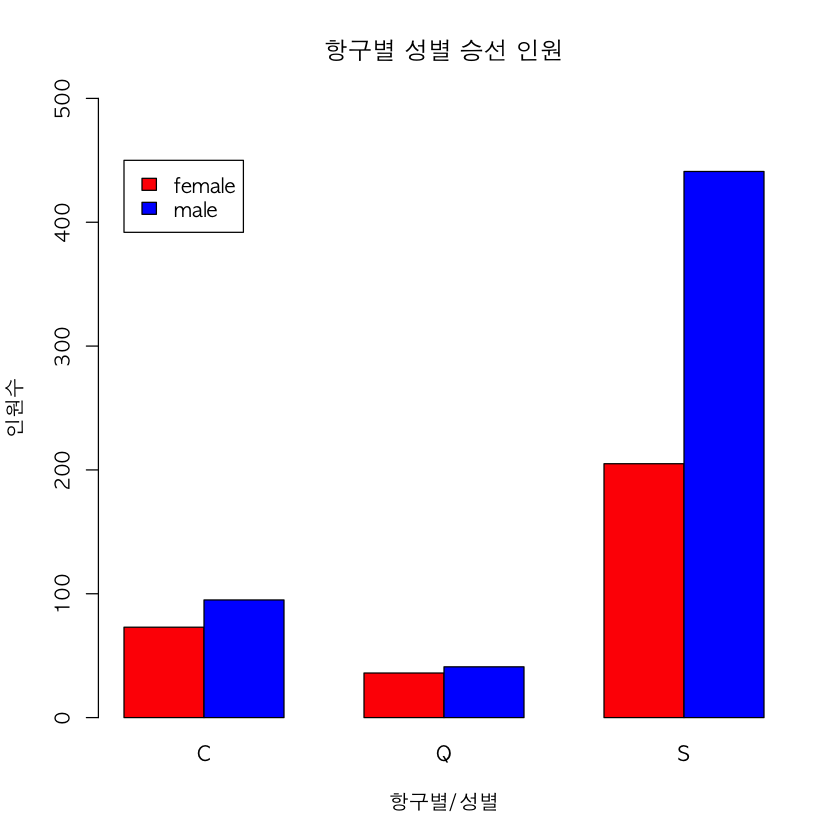

In [56]:
# 항구별 성별 승선 인원

par(family = "AppleGothic")


barplot(t(table(train_df$Embarked, train_df$Sex)), # table에 ,로 연결하여 조건생성
       beside = T,
       col = c("red", "blue"),
       ylim = c(0, 500),
       ylab = "인원수",
       xlab = "항구별/성별",
       main = "항구별 성별 승선 인원",
       
       )

legend(1, 450,   # x, y 좌료
      c("female", "male"),
      fill = c("red", "blue"),      
      )


In [57]:
t(table(train_df$Embarked, train_df$Sex))

        
           C   Q   S
  female  73  36 205
  male    95  41 441

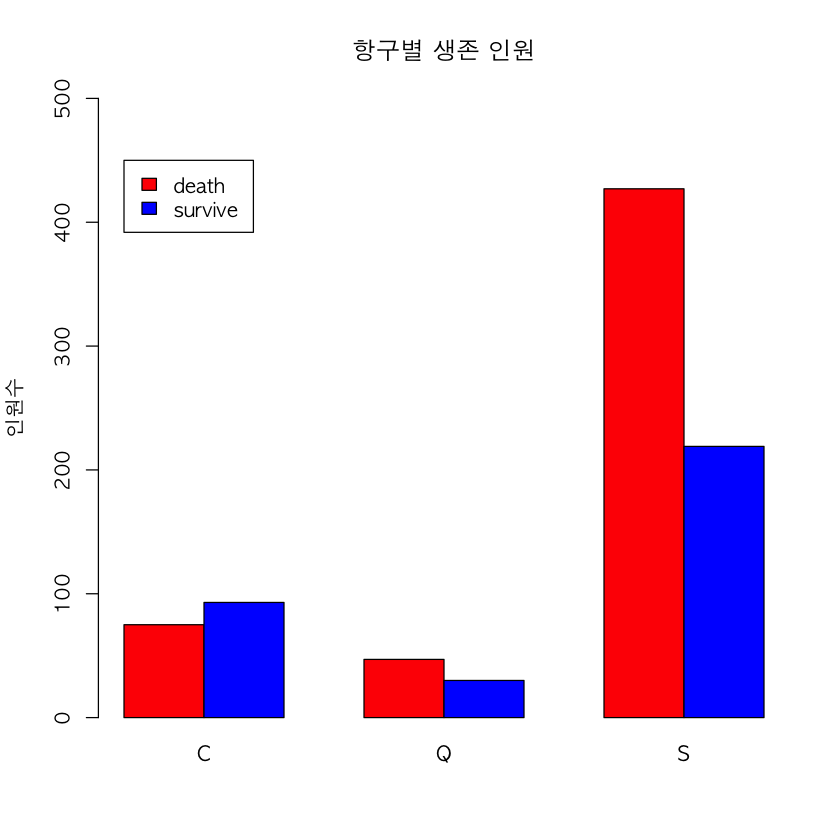

In [58]:
# 항구별 생존 인원
par(family = "AppleGothic")

barplot(t(table(train_df$Embarked, train_df$Survived)),
        beside = T,
        col = c("red", "blue"),
        ylim = c(0, 500),
        main = "항구별 생존 인원",
        ylab = "인원수"
       )



legend(1, 450,   # x, y 좌료
      c("death", "survive"),
      fill = c("red", "blue"),      
      )


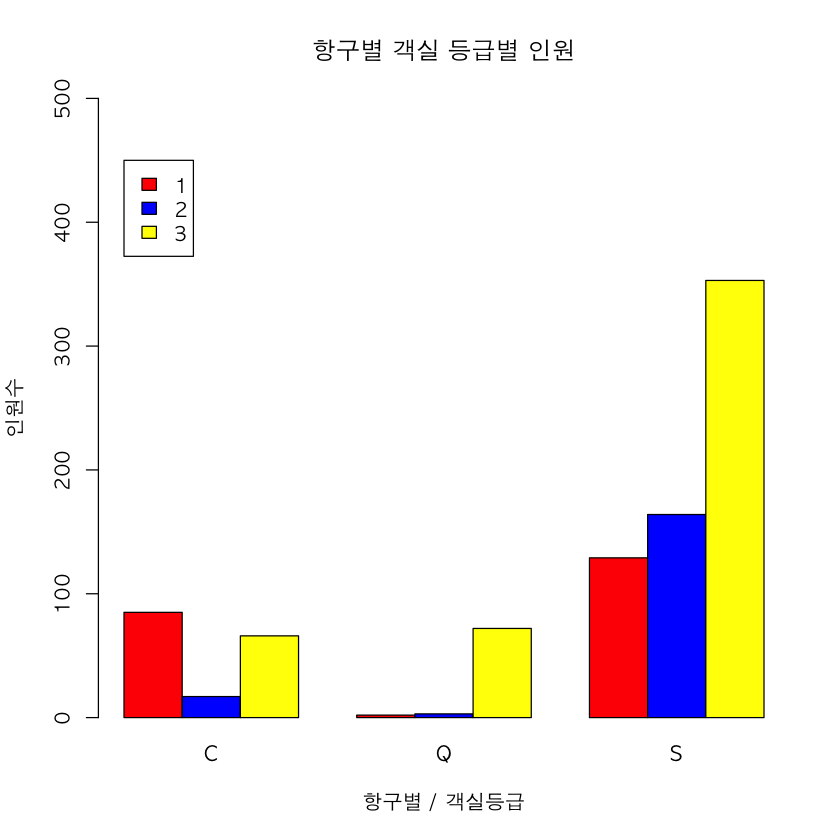

In [59]:
# 항구별 객실 등급별 인원

par(family = "AppleGothic")
barplot(t(table(train_df$Embarked, train_df$Pclass)),
        beside = T,
        col = c("red", "blue", "yellow"),
        main = "항구별 객실 등급별 인원",
        ylim = c(0, 500),
        ylab = "인원수",
        xlab = "항구별 / 객실등급"
       )


legend(1, 450,   # x, y 좌료
      c(1:3),
      fill = c("red", "blue", "yellow"),      
      )


In [60]:
# 그래프 한눈에 보기

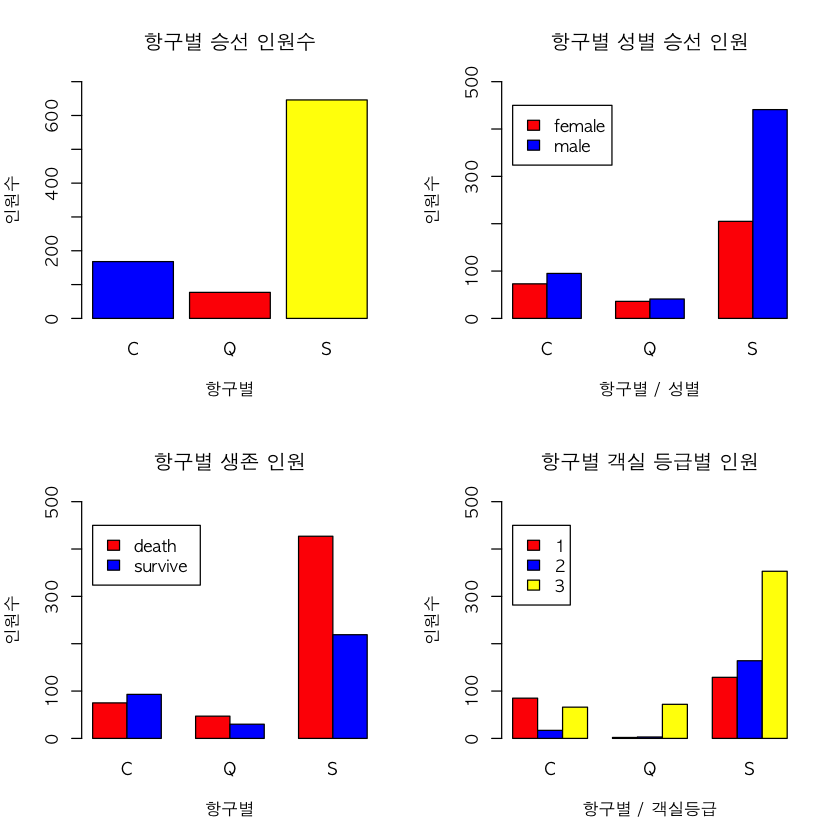

In [61]:
par(mfrow = c(2,2)) 
par(family = "AppleGothic")


barplot(table(train_df$Embarked),
       col = c("blue", "red", "yellow"),
       xlab = "항구별",
       ylab = "인원수",
       main = "항구별 승선 인원수",
       ylim = c(0, 700),
       lengend.text = T
       
       )


barplot(t(table(train_df$Embarked, train_df$Sex)), # table에 ,로 연결하여 조건생성
       beside = T,
       col = c("red", "blue"),
       ylim = c(0, 500),
       ylab = "인원수",
       xlab = "항구별 / 성별",
       main = "항구별 성별 승선 인원",
       
       )

legend(1, 450,   # x, y 좌료
      c("female", "male"),
      fill = c("red", "blue"),      
      )

barplot(t(table(train_df$Embarked, train_df$Survived)),
        beside = T,
        col = c("red", "blue"),
        ylim = c(0, 500),
        main = "항구별 생존 인원",
        ylab = "인원수",
        xlab = "항구별"
       )

legend(1, 450,   # x, y 좌료
      c("death", "survive"),
      fill = c("red", "blue"),      
      )



barplot(t(table(train_df$Embarked, train_df$Pclass)),
        beside = T,
        col = c("red", "blue", "yellow"),
        main = "항구별 객실 등급별 인원",
        ylim = c(0, 500),
        ylab = "인원수",
        xlab = "항구별 / 객실등급"
       )


legend(1, 450,   # x, y 좌료
      c(1:3),
      fill = c("red", "blue", "yellow"),      
      )


---
# RandomForest로 예측모델 생성

In [62]:
# 복사본
train_df_T <- train_df

In [63]:
# 예측을 위한 컬럼 확인
target_col <- c("Survived", "Sex", "Pclass", "Embarked") # 데이터 취합방식 확인
head(train_df_T[, target_col]) 

Survived,Sex,Pclass,Embarked
0,male,3,S
0,male,3,S
0,male,3,Q
0,male,1,S
0,male,3,S
0,male,3,S


In [64]:
# Sex 칼럼을 숫자로 전환
train_df_T$SexCode[train_df_T$Sex == 'male'] <- 0
train_df_T$SexCode[train_df_T$Sex == 'female'] <- 1

In [65]:
tail(train_df_T)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C,1
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C,1
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C,1
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S,1
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,0


In [66]:
# Sex컬럼 삭제
train_df_T <- subset(train_df_T, select = -Sex)

In [67]:
head(train_df_T)

PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",20,0,0,A/5. 2151,8.0500,,S,0


In [68]:
target_col <- c("Survived", "SexCode", "Pclass", "Embarked")
head(train_df_T[, target_col])

Survived,SexCode,Pclass,Embarked
0,0,3,S
0,0,3,S
0,0,3,Q
0,0,1,S
0,0,3,S
0,0,3,S


# Emabarked를 숫자로 전환
C=0, S=1, Q=2 -> 맞긴 맞지만 좋은 생각이 아니다    
2 * S = Q ?   
S + S = Q ?   

### One-Hot Encoding방법
C == [1,0,0]   
S == [0,1,0]   
Q == [0,0,1]   
처럼 행렬로 만들면 덧셈과 뺄셈에 대해 각각 계산에 굉장히 안전해 진다.
R은 내부적으로 1은 True, 0은 False

In [69]:
train_df_T$Embarked_C = train_df_T$Embarked == "C"
train_df_T$Embarked_S = train_df_T$Embarked == "S"
train_df_T$Embarked_Q = train_df_T$Embarked == "Q"


head(train_df_T[c('Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q')])

Embarked,Embarked_C,Embarked_S,Embarked_Q
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
Q,FALSE,FALSE,TRUE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE


In [70]:
target_col = c("Survived", "Pclass" ,"SexCode", "Embarked_C", "Embarked_S", "Embarked_Q")  # 데이터 취합방식 확인
head(train_df_T[, target_col])

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [71]:
train_data <- train_df_T[, target_col]

In [72]:
head(train_data)

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [73]:
str(train_data)

'data.frame':	891 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [74]:
# Sampling
library(caret)
set.seed(1234)
samp <- createDataPartition(train_data$Survived, p=0.7, list=F)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [75]:
# 학습용
data.train <- train_data[samp,]

In [76]:
# 검증용
data.test <- train_data[-samp,]

In [77]:
# 문제 및 정답
x <- subset(data.test, select = -Survived)
y <- data.test$Survived

In [78]:
# 학습시키기
library(randomForest)
rf <- randomForest(Survived ~., data = data.train, ntree=100)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



In [79]:
# 검증하기
pred <- predict(rf, x)
head(pred)
head(y)

5         6         7         8         9        16 
0.2142584 0.2142584 0.2142584 0.3813423 0.2311170 0.4489231

[1] 0 0 0 0 0 0

In [80]:
pred[pred <= 0.5] <- 0
pred[pred > 0.5] <- 1

In [81]:
mean(pred == y)

[1] 0.7790262

--- 
### Survived를 factor로 변환후에 RandomForest 실행

In [82]:
data.train$Survived <- as.factor(data.train$Survived)
data.test$Survived <- as.factor(data.test$Survived)
str(data.train)

'data.frame':	624 obs. of  6 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass    : int  3 3 3 1 3 2 3 3 1 3 ...
 $ SexCode   : num  0 0 0 0 1 0 1 0 0 0 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [83]:
rf <- randomForest(Survived ~., data = data.train, ntree=100)

In [84]:
x <- subset(data.test, select = -Survived)
y <- data.test$Survived

In [85]:
pred <- predict(rf, x)
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  0 
Levels: 0 1

In [86]:
mean(pred == y)
table(pred, y)

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

In [149]:
## Feature 추가를 위한 확인

In [150]:
train_df_T$Age2 <- (train_df_T$Age %/% 10) * 10

In [151]:
head(train_df_T)

PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,Embarked_C,Embarked_S,Embarked_Q,Age2
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0,FALSE,TRUE,FALSE,20
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,0,FALSE,TRUE,FALSE,30
6,0,3,"Moran, Mr. James",NA,0,0,330877,8.4583,,Q,0,FALSE,FALSE,TRUE,NA
7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,0,FALSE,TRUE,FALSE,50
8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,0,FALSE,TRUE,FALSE,0
13,0,3,"Saundercock, Mr. William Henry",20,0,0,A/5. 2151,8.0500,,S,0,FALSE,TRUE,FALSE,20


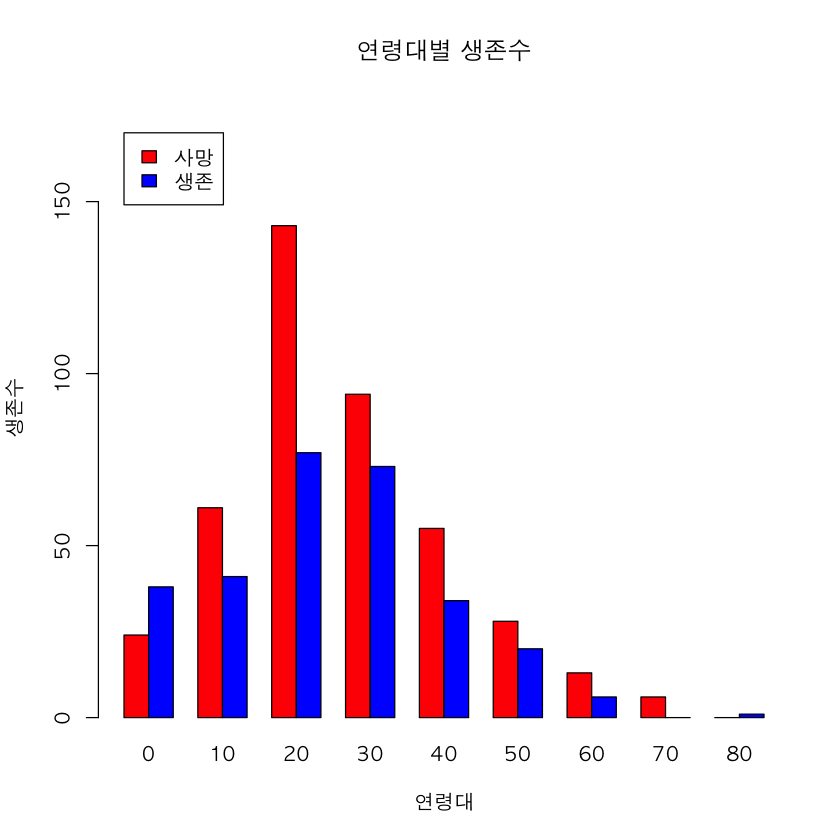

In [152]:
# 나이별 생존
par(family = "AppleGothic")

barplot(t(table(train_df_T$Age2, train_df_T$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylab = "생존수",
        ylim = c(0, 180),
        main = "연령대별 생존수"
       
       )

legend(1, 170,   # x, y 좌료
      c("사망", "생존"),
      fill = c("red", "blue"),      
      )


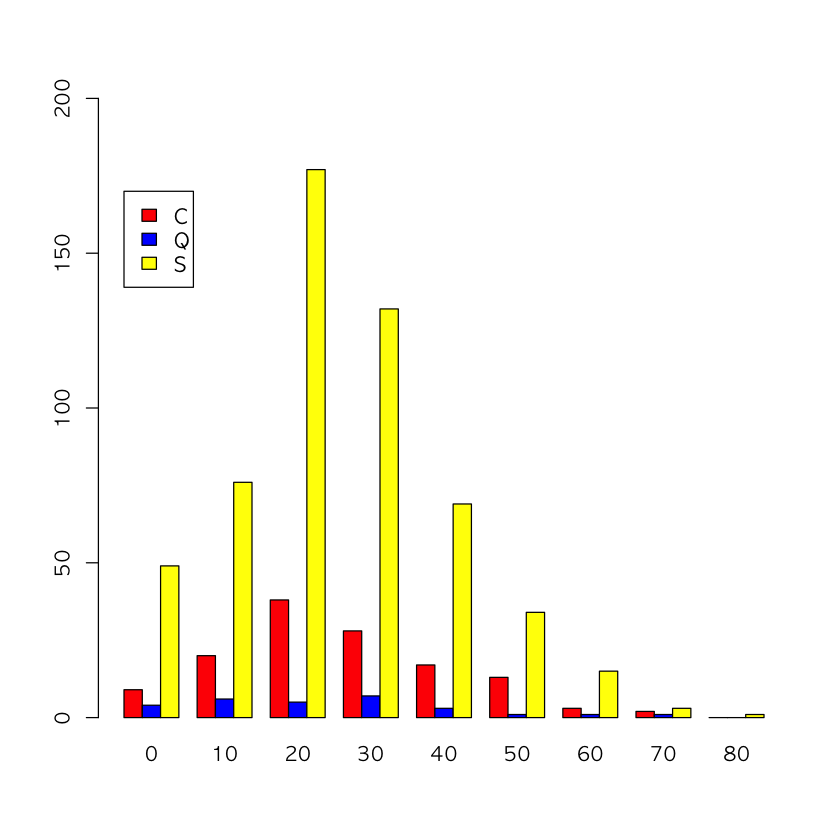

In [153]:
# 항구별 나이
par(family = "AppleGothic")

barplot(t(table(train_df_T$Age2, train_df_T$Embarked)),
        beside = T,
        col = c("red", "blue", "yellow"),
        ylim = c(0, 200)
       )

legend(1, 170,   # x, y 좌료
      c("C", "Q", "S"),
      fill = c("red", "blue", "yellow"),      
      )


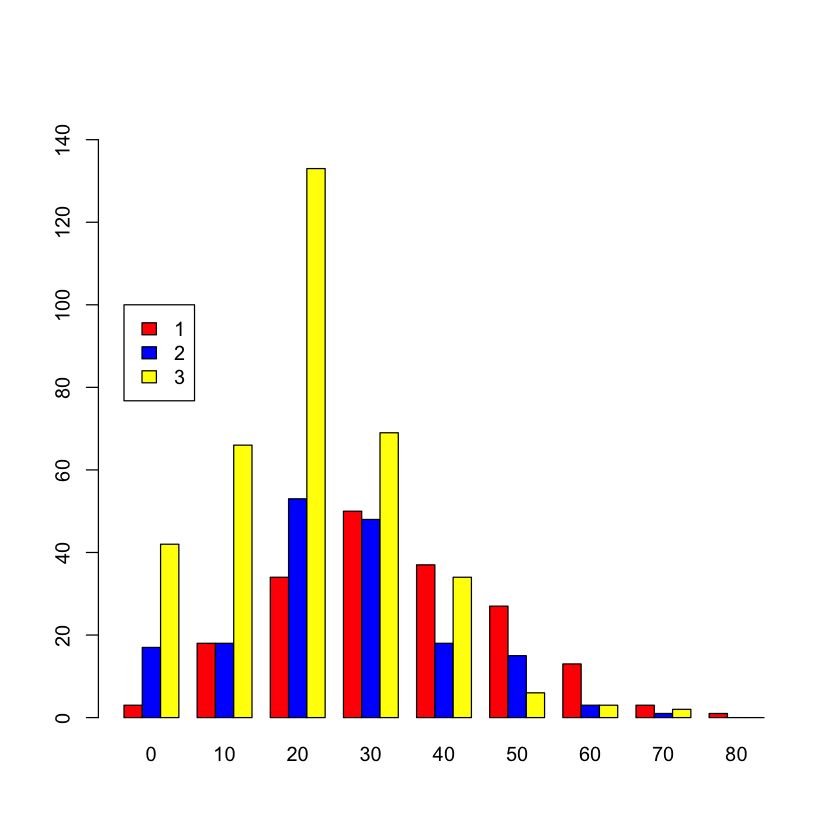

In [154]:
barplot(t(table(train_df_T$Age2, train_df_T$Pclass)),
        beside = T,
        col = c("red", "blue", "yellow"),
        ylim = c(0, 150),        
       
       )


legend(1, 100,   # x, y 좌료
      c("1", "2", "3"),
      fill = c("red", "blue", "yellow"),      
      )


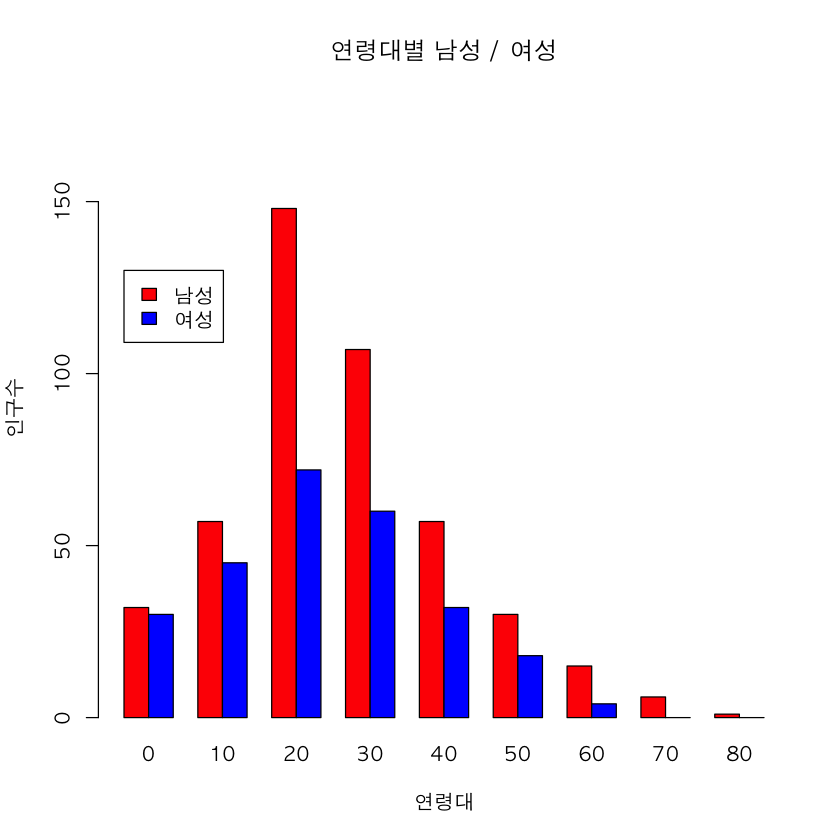

In [155]:

par(family = "AppleGothic")
barplot(t(table(train_df_T$Age2, train_df_T$SexCode)),
        beside = T,
        col = c("red", "blue"),
        ylim = c(0, 180),
        main = "연령대별 남성 / 여성",
        ylab = "인구수",
        xlab = "연령대"
        
       )

legend(1, 130,   # x, y 좌료
      c("남성", "여성"),
      fill = c("red", "blue"),      
      )

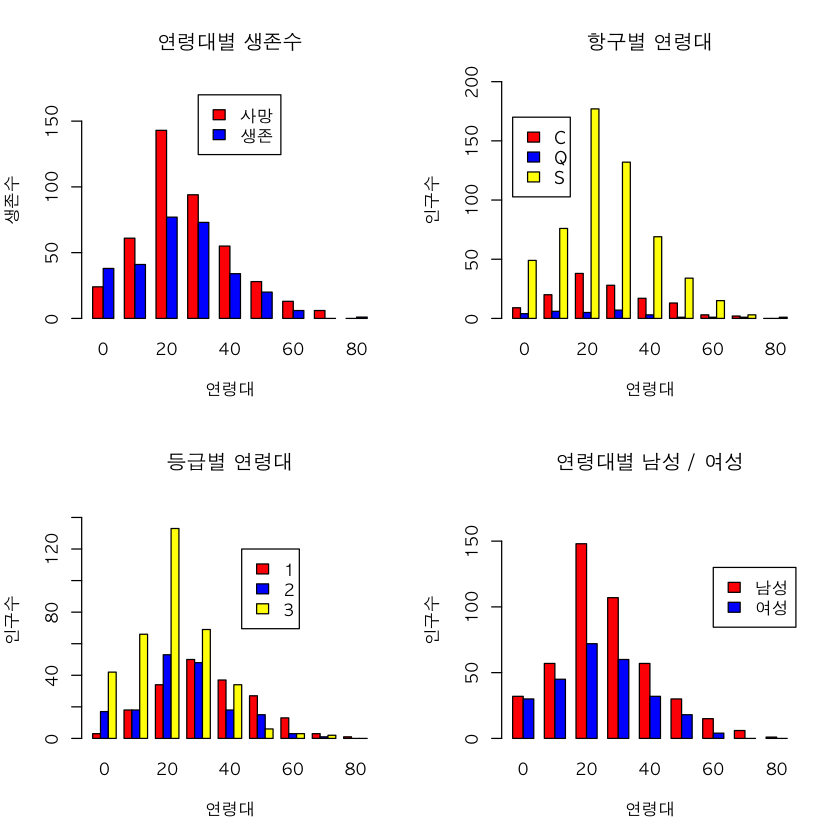

In [156]:
par(mfrow = c(2,2)) 
par(family = "AppleGothic")

barplot(t(table(train_df_T$Age2, train_df_T$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylab = "생존수",
        ylim = c(0, 180),
        main = "연령대별 생존수"
       
       )

legend(11, 170,   # x, y 좌료
      c("사망", "생존"),
      fill = c("red", "blue"),      
      )

barplot(t(table(train_df_T$Age2, train_df_T$Embarked)),
        beside = T,
        col = c("red", "blue", "yellow"),
        ylim = c(0, 200),
        main = "항구별 연령대",
        xlab = "연령대",
        ylab = "인구수"
       )

legend(1, 170,   # x, y 좌료
      c("C", "Q", "S"),
      fill = c("red", "blue", "yellow"),      
      )


barplot(t(table(train_df_T$Age2, train_df_T$Pclass)),
        beside = T,
        col = c("red", "blue", "yellow"),
        ylim = c(0, 150),  
        main = "등급별 연령대",
        xlab = "연령대",
        ylab = "인구수",
       
       )


legend(20, 120,   # x, y 좌료
      c("1", "2", "3"),
      fill = c("red", "blue", "yellow"),      
      )


barplot(t(table(train_df_T$Age2, train_df_T$SexCode)),
        beside = T,
        col = c("red", "blue"),
        ylim = c(0, 180),
        main = "연령대별 남성 / 여성",
        ylab = "인구수",
        xlab = "연령대"
        
       )

legend(20, 130,   # x, y 좌료
      c("남성", "여성"),
      fill = c("red", "blue"),      
      )

In [157]:
# 항구별 생존, 사망 연령대
head(train_df_T)

PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,Embarked_C,Embarked_S,Embarked_Q,Age2
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0,FALSE,TRUE,FALSE,20
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,0,FALSE,TRUE,FALSE,30
6,0,3,"Moran, Mr. James",NA,0,0,330877,8.4583,,Q,0,FALSE,FALSE,TRUE,NA
7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,0,FALSE,TRUE,FALSE,50
8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,0,FALSE,TRUE,FALSE,0
13,0,3,"Saundercock, Mr. William Henry",20,0,0,A/5. 2151,8.0500,,S,0,FALSE,TRUE,FALSE,20


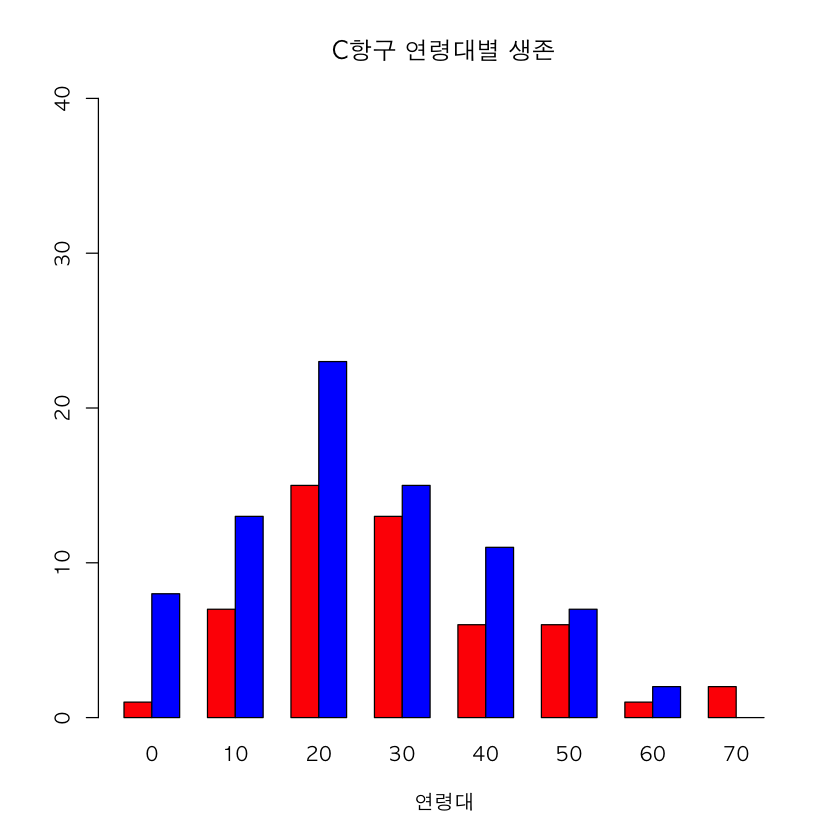

In [169]:
CC <- subset(train_df_T, Embarked_C == TRUE)
par(family = "AppleGothic")
barplot(t(table(CC$Age2, CC$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylim = c(0, 40),
        main = "C항구 연령대별 생존"
       
       
       )

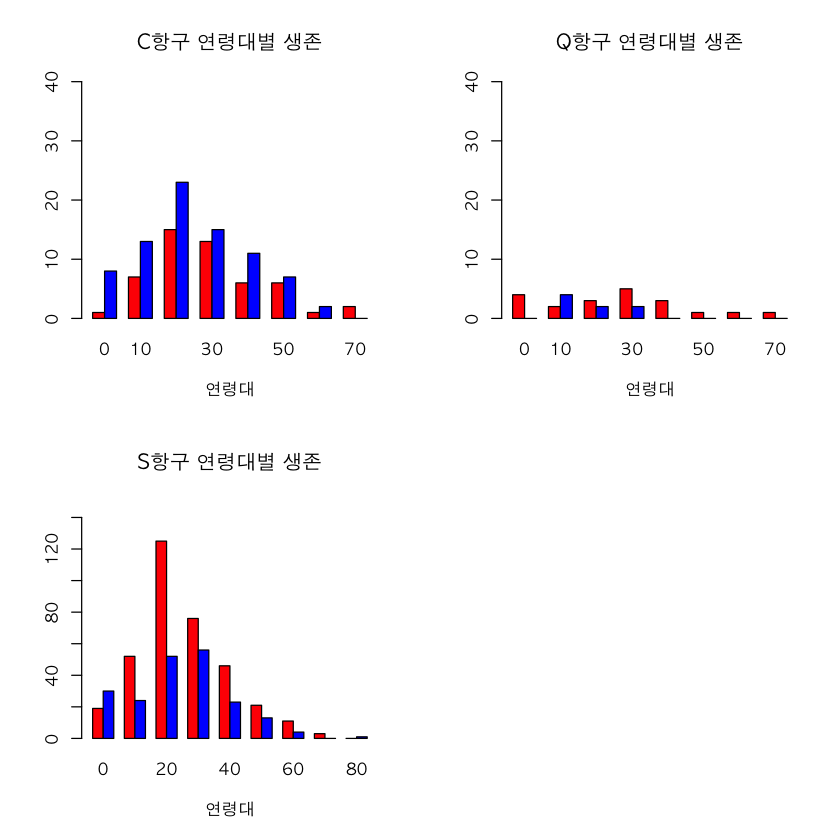

In [175]:
par(mfrow = c(2,2)) 
par(family = "AppleGothic")


CC <- subset(train_df_T, Embarked_C == TRUE)
par(family = "AppleGothic")
barplot(t(table(CC$Age2, CC$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylim = c(0, 40),
        main = "C항구 연령대별 생존"      
       
       )


QQ <- subset(train_df_T, Embarked_Q == TRUE)
par(family = "AppleGothic")
barplot(t(table(QQ$Age2, QQ$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylim = c(0, 40),
        main = "Q항구 연령대별 생존"      
       
       )



SS <- subset(train_df_T, Embarked_S == TRUE)
par(family = "AppleGothic")
barplot(t(table(SS$Age2, SS$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylim = c(0, 150),
        main = "S항구 연령대별 생존"      
       
       )

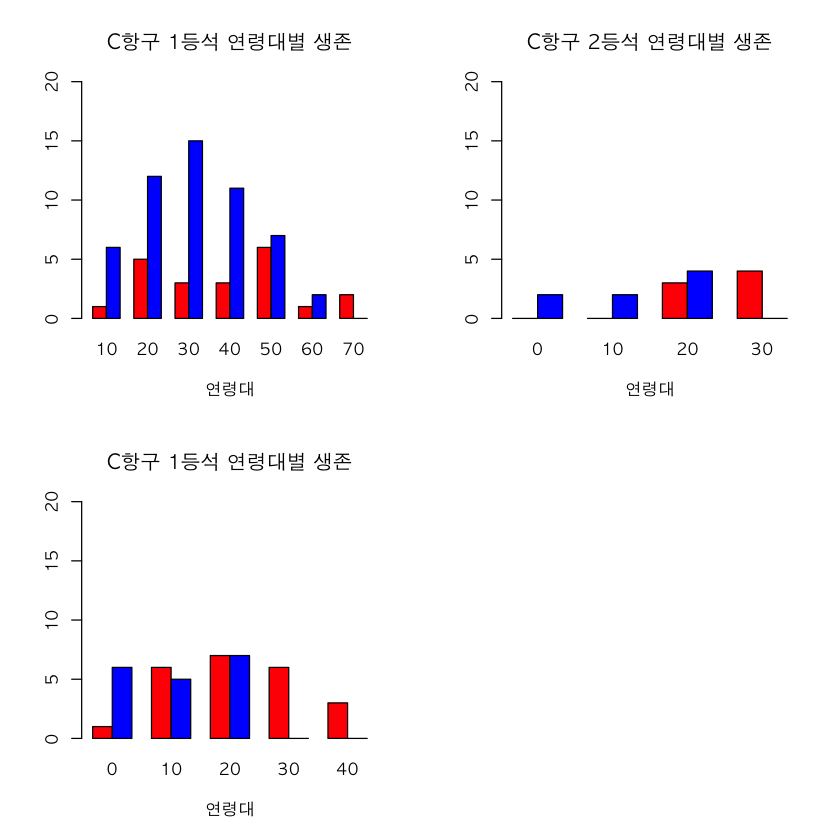

In [182]:
# 항구별 등급별 생존/사망
# C 항구

CC <- subset(train_df_T, Embarked_C == TRUE)
par(mfrow = c(2,2)) 
par(family = "AppleGothic")

CC1 <- subset(CC, Pclass == 1)

par(family = "AppleGothic")
barplot(t(table(CC1$Age2, CC1$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylim = c(0, 20),
        main = "C항구 1등석 연령대별 생존"   
       )


CC2 <- subset(CC, Pclass == 2)

par(family = "AppleGothic")
barplot(t(table(CC2$Age2, CC2$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylim = c(0, 20),
        main = "C항구 2등석 연령대별 생존"      
       )

CC3 <- subset(CC, Pclass == 3)

par(family = "AppleGothic")
barplot(t(table(CC3$Age2, CC3$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylim = c(0, 20),
        main = "C항구 1등석 연령대별 생존"      
       )

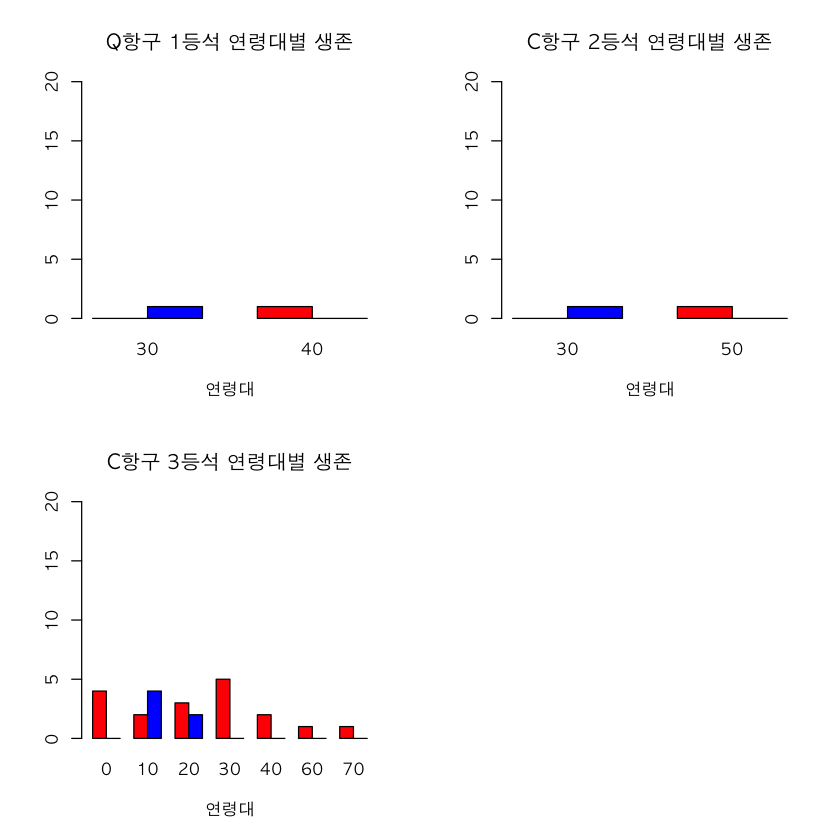

In [183]:
# 항구별 등급별 생존/사망
# C 항구

QQ <- subset(train_df_T, Embarked_Q == TRUE)
par(mfrow = c(2,2)) 
par(family = "AppleGothic")

QQ1 <- subset(QQ, Pclass == 1)

par(family = "AppleGothic")
barplot(t(table(QQ1$Age2, QQ1$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylim = c(0, 20),
        main = "Q항구 1등석 연령대별 생존"   
       )


QQ2 <- subset(QQ, Pclass == 2)

par(family = "AppleGothic")
barplot(t(table(QQ2$Age2, QQ2$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylim = c(0, 20),
        main = "C항구 2등석 연령대별 생존"      
       )

QQ3 <- subset(QQ, Pclass == 3)

par(family = "AppleGothic")
barplot(t(table(QQ3$Age2, QQ3$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylim = c(0, 20),
        main = "C항구 3등석 연령대별 생존"      
       )

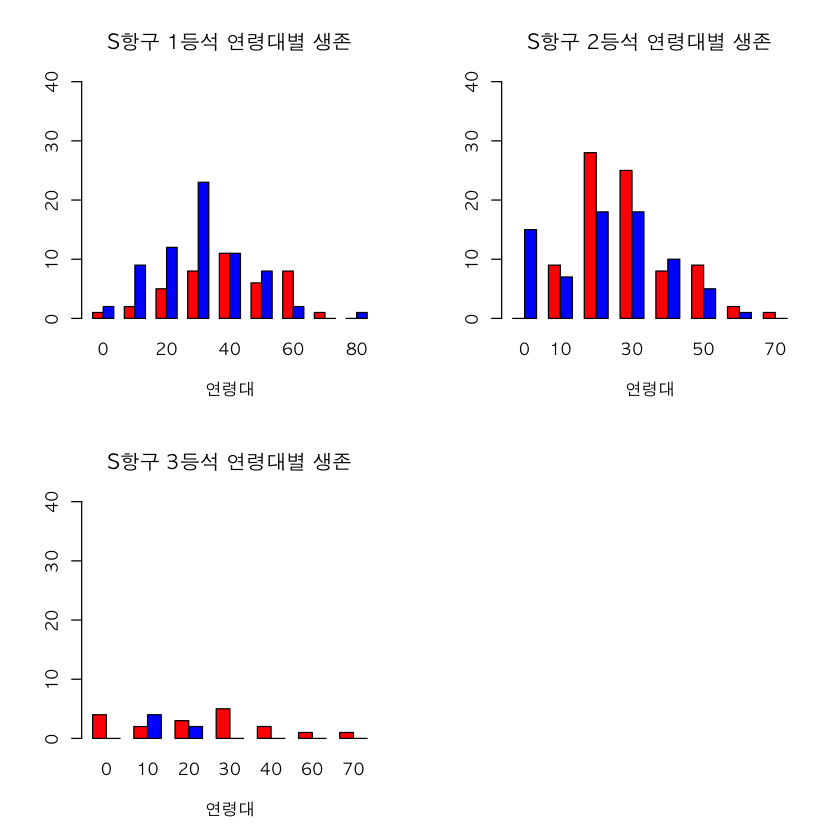

In [189]:
# 항구별 등급별 생존/사망
# S 항구

SS <- subset(train_df_T, Embarked_S == TRUE)
par(mfrow = c(2,2)) 
par(family = "AppleGothic")

SS1 <- subset(SS, Pclass == 1)

par(family = "AppleGothic")
barplot(t(table(SS1$Age2, SS1$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylim = c(0, 40),
        main = "S항구 1등석 연령대별 생존"   
       )


SS2 <- subset(SS, Pclass == 2)

par(family = "AppleGothic")
barplot(t(table(SS2$Age2, SS2$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylim = c(0, 40),
        main = "S항구 2등석 연령대별 생존"      
       )

SS3 <- subset(QQ, Pclass == 3)

par(family = "AppleGothic")
barplot(t(table(SS3$Age2, SS3$Survived)),
        beside = T,
        col = c("red", "blue"),
        xlab = "연령대",
        ylim = c(0, 40),
        main = "S항구 3등석 연령대별 생존"      
       )